# Partie 1
## Pb 1

In [2]:
##import data
from keras.datasets import mnist
import numpy as np
(train_images,_),(test_images,_)=mnist.load_data()
print(train_images.shape)
print(test_images.shape)

(60000, 28, 28)
(10000, 28, 28)


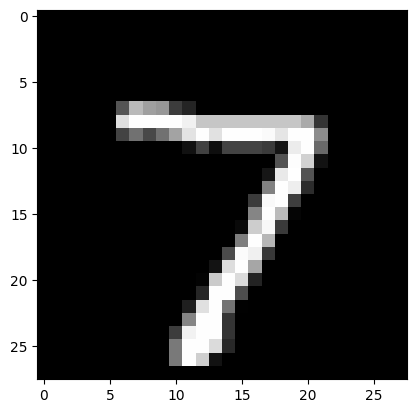

In [3]:
##show an example of the images
import matplotlib.pyplot as plt
plt.imshow(test_images[0])
plt.gray()

In [4]:
##normalize all data set
train_images = train_images.astype('float32')/255.
test_images = test_images.astype('float32')/255.

In [5]:
###reshape
train_images = train_images.reshape(len(train_images),
                                    np.prod(train_images.shape[1:]))
test_images = test_images.reshape(len(test_images),
                                  np.prod(test_images.shape[1:]))

In [6]:
print(train_images.shape)
print(test_images.shape)

(60000, 784)
(10000, 784)


In [7]:
from keras.layers import Input, Dense
from keras.models import Model

encoding_dim = 32
#the input layer with 784 features
input_layer = Input(shape=(784,))
#the hidden or encoded layer with 32 dimensions
encoder_layer1 = Dense(encoding_dim, activation='relu')(input_layer)
#the decoded layer with 784 features
decoder_layer1 = Dense(784, activation='sigmoid')(encoder_layer1)

# this model maps an input to its reconstruction
autoencoder = Model(input_layer, decoder_layer1)
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


In [8]:
####testing to make the two seperately
encoder = Model(input_layer,encoder_layer1)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))

In [9]:
#### Compile autoencoder
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [10]:
epochs = 60
batch_size = 256

autoencoder.fit(train_images,train_images,
                epochs=epochs,
                batch_size=batch_size,
                shuffle=True,
                validation_data=(test_images,test_images))

Epoch 1/60


235/235 [==============================] - 3s 9ms/step - loss: 0.2773 - val_loss: 0.1896
Epoch 2/60
235/235 [==============================] - 2s 9ms/step - loss: 0.1697 - val_loss: 0.1525
Epoch 3/60
235/235 [==============================] - 2s 9ms/step - loss: 0.1438 - val_loss: 0.1336
Epoch 4/60
235/235 [==============================] - 2s 8ms/step - loss: 0.1285 - val_loss: 0.1212
Epoch 5/60
235/235 [==============================] - 1s 6ms/step - loss: 0.1182 - val_loss: 0.1127
Epoch 6/60
235/235 [==============================] - 1s 6ms/step - loss: 0.1110 - val_loss: 0.1069
Epoch 7/60
235/235 [==============================] - 1s 5ms/step - loss: 0.1059 - val_loss: 0.1026
Epoch 8/60
235/235 [==============================] - 1s 5ms/step - loss: 0.1022 - val_loss: 0.0995
Epoch 9/60
235/235 [==============================] - 1s 5ms/step - loss: 0.0996 - val_loss: 0.0974
Epoch 10/60
235/235 [==============================] - 1s 5ms/step - loss: 0.0978 - val_loss: 0.0959
Epoch 11/6

In [11]:
encoded_imgs = encoder.predict(test_images)
print(encoded_imgs.shape)

313/313 [==============================] - 0s 899us/step
(10000, 32)


In [12]:
decoded_imgs = decoder.predict(encoded_imgs)
print(decoded_imgs.shape)

313/313 [==============================] - 0s 898us/step
(10000, 784)


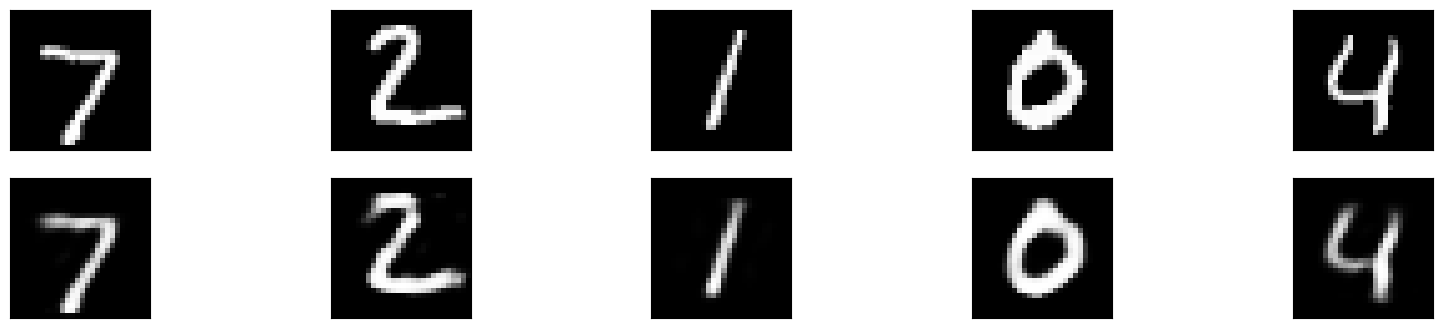

In [13]:
######plot the first 5
import matplotlib.pyplot as plt

n=5
plt.figure(figsize=(20,4))
for i in range(n):
    #original images
    ax = plt.subplot(2,n,i+1)
    plt.imshow(test_images[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    
    #reconstructed images
    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_imgs[i].reshape(28,28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

On observe de très bon résultats malgré certaines imprecisions des contours pour le 4 par exemple. 

In [14]:
autoencoder.predict(test_images,)

313/313 [==============================] - 0s 931us/step


array([[4.2151393e-11, 1.7374796e-10, 5.8091476e-11, ..., 1.9425622e-10,
        1.9137254e-11, 9.9627112e-11],
       [1.6994774e-12, 1.6262871e-11, 1.5626919e-10, ..., 5.3330007e-11,
        8.2283548e-11, 7.0180042e-11],
       [6.8636325e-08, 2.1983149e-07, 5.0925696e-08, ..., 3.5295862e-08,
        5.3041887e-08, 1.9987579e-07],
       ...,
       [3.7888922e-14, 1.7826233e-13, 8.2883029e-15, ..., 4.5375135e-14,
        1.9918882e-15, 4.7310485e-13],
       [1.0317189e-13, 5.0060834e-13, 7.1157137e-14, ..., 4.0588163e-13,
        4.4772058e-14, 3.5552185e-13],
       [3.8236553e-20, 4.8417654e-20, 9.7651263e-20, ..., 6.0398273e-20,
        3.7281909e-20, 2.2854571e-20]], dtype=float32)

#### question 8

en suivant les consignes de la question, nous allons:

Parcourir chaque combinaison d'optimiseur et de fonction de perte.
Réinitialiser et compiler l'autoencodeur avec chaque combinaison.
Entraîner le modèle sur les données d'entraînement.
Prédire sur les données de test et calculer l'erreur quadratique moyenne (MSE).
Stocker et trier les résultats en fonction de la MSE.

In [15]:
from keras.metrics import mean_squared_error
import numpy as np

# Définition des combinaisons d'optimiseurs et de fonctions de perte
combinations = [
    ('adam', 'binary_crossentropy'),
    ('sgd', 'binary_crossentropy'),
    ('adam', 'mean_squared_error'),
    ('sgd', 'mean_squared_error')
]

# Espace pour stocker les résultats
results = []

for optimizer, loss_function in combinations:
    # Réinitialiser le modèle avec la même architecture
    autoencoder = Model(input_layer, decoder_layer1)
    
    # Compiler le modèle avec le nouvel optimiseur et la nouvelle fonction de perte
    autoencoder.compile(optimizer=optimizer, loss=loss_function)

    # Entraîner le modèle
    autoencoder.fit(train_images, train_images,
                    epochs=50,
                    batch_size=256,
                    shuffle=True,
                    validation_data=(test_images, test_images))

    # Prédire sur les données de test
    decoded_images = autoencoder.predict(test_images)

    # Calculer la MSE (erreur quadratique moyenne)
    mse = np.mean(mean_squared_error(test_images, decoded_images))

    # Stocker les résultats
    results.append((f'Optimiseur: {optimizer}, Perte: {loss_function}', mse))

# Trier les résultats par mse
results.sort(key=lambda x: x[1])

# Afficher les résultats
for combination, mse in results:
    print(f'{combination} - MSE: {mse}')


Epoch 1/50
235/235 [==============================] - 2s 5ms/step - loss: 0.0926 - val_loss: 0.0914
Epoch 2/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 3/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0926 - val_loss: 0.0914
Epoch 4/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0915
Epoch 5/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0926 - val_loss: 0.0915
Epoch 6/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0926 - val_loss: 0.0914
Epoch 7/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 8/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 9/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0914
Epoch 10/50
235/235 [==============================] - 1s 5ms/step - loss: 0.0925 - val_loss: 0.0914

La meilleure performance est obtenue avec l'optimiseur SGD et la fonction de perte `mean_squared_error`, indiquant une légère supériorité dans la reconstruction des images. Les optimiseurs Adam et SGD montrent des performances comparables, soulignant leur efficacité. La fonction de perte `mean_squared_error` s'avère légèrement plus performante, probablement car elle est directement liée à la minimisation de l'erreur de reconstruction, ce qui est crucial pour les autoencodeurs. Les différences minimes entre les combinaisons suggèrent que le modèle d'autoencodeur est relativement robuste aux variations de ces paramètres pour le dataset MNIST. La simplicité de la base de données exploité justifie la proximité des résultats. 

#### question 9

On va maintenant entraîner l'autoencodeur avec différentes combinaisons d'époques et de taille de lot, puis calculer et afficher la MSE pour chaque combinaison. Vous pourrez ainsi identifier la combinaison optimale.

In [16]:
combinations = [
    (10, 100),  # 10 epochs, 128 batch_size
    (10, 500),  # 10 epochs, 256 batch_size
    (50, 100),  # 50 epochs, 128 batch_size
    (50, 500)   # 50 epochs, 256 batch_size
]

results = []

for epochs, batch_size in combinations:
    # Reinitialiser et compiler l'autoencodeur
    autoencoder.compile(optimizer='sgd', loss='mean_squared_error')

    # Entraîner le modèle avec les nouvelles valeurs
    autoencoder.fit(train_images, train_images,
                    epochs=epochs,
                    batch_size=batch_size,
                    shuffle=True,
                    validation_data=(test_images, test_images))

    # Calculer la MSE sur les données de test
    decoded_images = autoencoder.predict(test_images)
    mse = np.mean(mean_squared_error(test_images, decoded_images))

    # Ajouter les résultats
    results.append(((epochs, batch_size), mse))

# Afficher les résultats sous forme de tableau
print("Epochs, Batch Size - MSE")
for comb, mse in results:
    print(f"{comb} - {mse}")


Epoch 1/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 2/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 3/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 4/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 5/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 6/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 7/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 8/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 9/10
600/600 [==============================] - 1s 2ms/step - loss: 0.0094 - val_loss: 0.0092
Epoch 10/10
313/313 [==============================] - 0s 751us/step
Epoch 1/10
120/120 [===========

Les résultats montrent des MSE très similaires pour toutes les combinaisons d'époques et de tailles de lot, indiquant une influence minime de ces paramètres sur la performance de l'autoencodeur dans ce cas. Cependant, la combinaison (50 époques, 500 en taille de lot) donne la MSE la plus faible, suggérant une amélioration marginale en augmentant à la fois le nombre d'époques et la taille de lot. Cela peut indiquer que l'autoencodeur bénéficie d'un entraînement plus long et de lots plus importants pour affiner légèrement ses performances. Néanmoins, étant donné la faible différence entre les combinaisons, le choix spécifique d'époques et de taille de lot semble avoir un impact limité dans ce contexte.

Pour obtenir des résultats plus significatifs, on pourrait essayer :

1. **Elargir la Gamme des Paramètres** : Tester des époques et des tailles de lot plus variées.
2. **Optimisation Hyperparamétrique** : Utiliser des techniques comme Grid Search ou Random Search.
3. **Modifier l'Architecture du Modèle** : Expérimenter avec différentes architectures de l'autoencodeur.
4. **Utiliser un Dataset Plus Complex** : Essayer avec des ensembles de données plus exigeants que MNIST.
5. **Analyser d'Autres Métriques** : Considérer d'autres mesures de performance en plus de la MSE.



#### question 10

Model: "model_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_2 (Dense)             (None, 32)                25120     
                                                                 
 dense_3 (Dense)             (None, 784)               25872     
                                                                 
Total params: 50,992
Trainable params: 50,992
Non-trainable params: 0
_________________________________________________________________


Epoch 1/50
120/120 [==============================] - 2s 11ms/step - loss: 0.3441 - val_loss: 0.2359
Epoch 2/50
120/120 [==============================] - 1s 10ms/step - loss: 0.2079 - val_loss: 0.1842
Epoch 3/50
120/120 [==============================] - 1s 11ms/step - loss: 0.1743 - val_loss: 0.1631
Epoch 4/50
120/120 [==============================] - 1s 10ms/step - loss: 0.1565 - val_loss: 0.1479
Epoch 5/50
120/120 [==============================] - 1s 11ms/step - loss: 0.1433 - val_loss: 0.1365
Epoch 6/50
120/120 [==============================] - 1s 11ms/step - loss: 0.1335 - val_loss: 0.1282
Epoch 7/50
120/120 [==============================] - 1s 11ms/step - loss: 0.1261 - val_loss: 0.1216
Epoch 8/50
120/120 [==============================] - 1s 10ms/step - loss: 0.1203 - val_loss: 0.1165
Epoch 9/50
120/120 [==============================] - 1s 10ms/step - loss: 0.1157 - val_loss: 0.1124
Epoch 10/50
120/120 [==============================] - 1s 10ms/step - loss: 0.1119 - val_lo

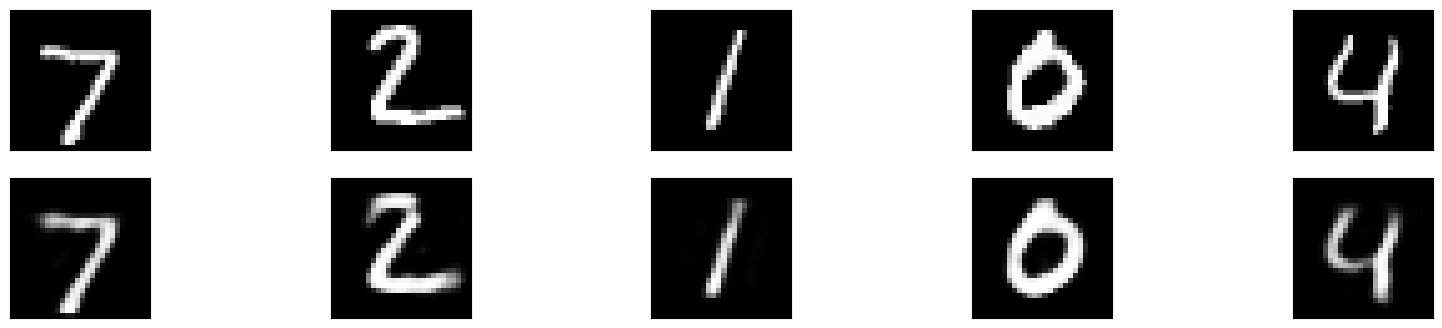

In [17]:
encoding_dim = 32
#the input layer with 784 features
input_layer = Input(shape=(784,))
#the hidden or encoded layer with 32 dimensions
encoder_layer1 = Dense(encoding_dim, activation='relu')(input_layer)
#the decoded layer with 784 features
decoder_layer1 = Dense(784, activation='sigmoid')(encoder_layer1)

# this model maps an input to its reconstruction
autoencoder = Model(input_layer, decoder_layer1)
autoencoder.summary()
####testing to make the two seperately
encoder = Model(input_layer,encoder_layer1)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input,decoder_layer(encoded_input))

#### Compile autoencoder
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')


# Entraînement de l'autoencodeur avec les paramètres optimaux
autoencoder.fit(train_images, train_images, epochs=50, batch_size=500, shuffle=True, validation_data=(test_images, test_images))

# Prédiction et visualisation des images
encoded_imgs = encoder.predict(test_images)
decoded_imgs = decoder.predict(encoded_imgs)

# Affichage des images originales et reconstruites
n = 5
plt.figure(figsize=(20, 4))
for i in range(n):
    # Images originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(test_images[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Images reconstruites
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


Les résultats semblent sensibelemnt mieux (comme le 4 ou le 1) mais dans l'ensemble ils étaient déjà bons. le set est surement trop simple pour qu'on voit la difference. 
Voici les anciens pour la comparaison:

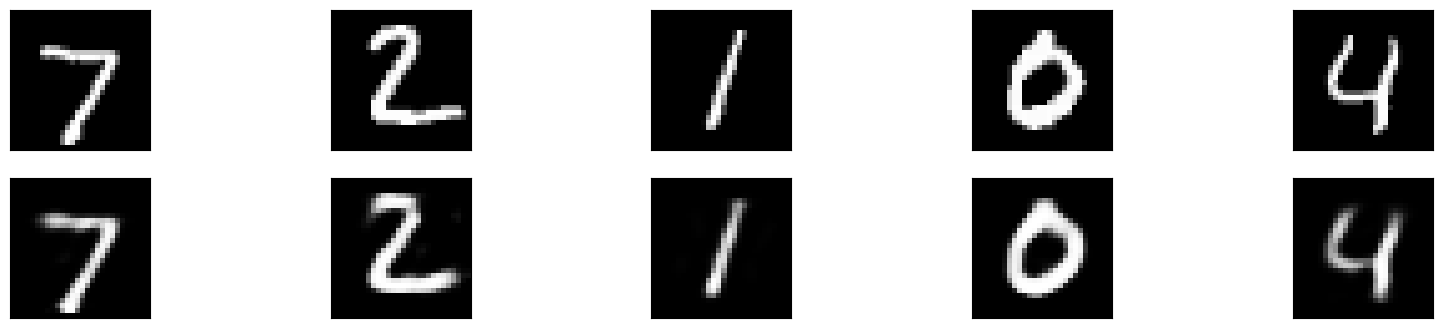

## Pb 2

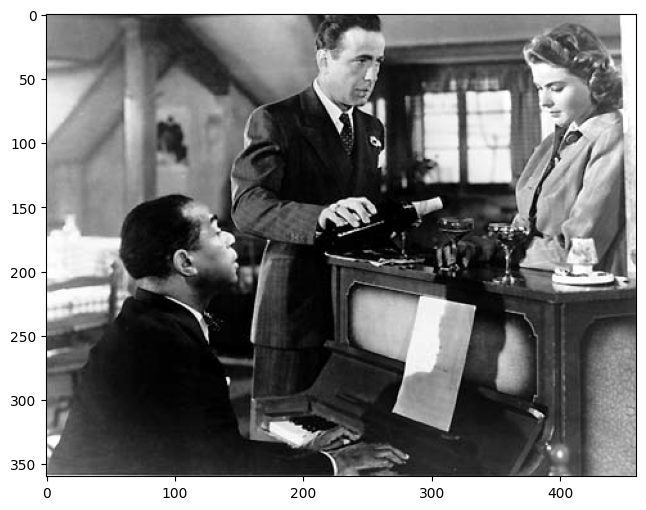

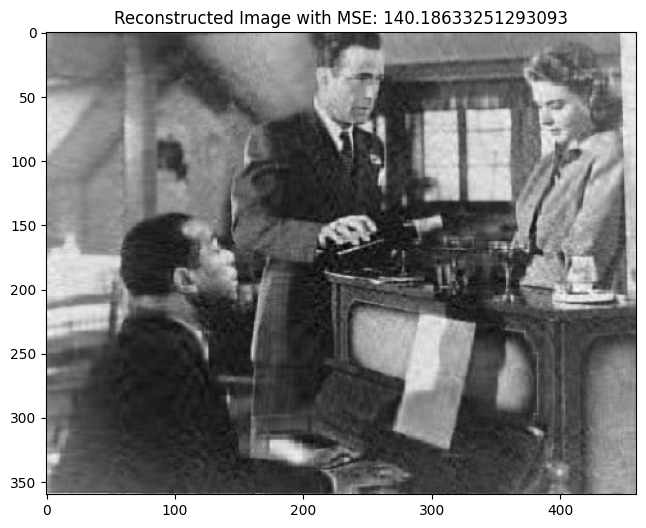

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import math
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Chargement de l'image
img = Image.open('pianobar.pgm')
plt.figure(figsize=(10,6))
plt.imshow(img, cmap=plt.cm.gray)
image_matrix = np.array(img)
original_dimensions = image_matrix.shape

# Réduction de dimension avec PCA
pca = PCA(n_components=46)
image_matrix_reduced = pca.fit_transform(image_matrix)
image_matrix_reconstructed = pca.inverse_transform(image_matrix_reduced)

# Calcul de la MSE
mse = np.mean((image_matrix - image_matrix_reconstructed) ** 2)

# Affichage de l'image reconstruite
plt.figure(figsize=(10,6))
plt.imshow(image_matrix_reconstructed, cmap=plt.cm.gray)
plt.title(f'Reconstructed Image with MSE: {mse}')
plt.show()


On voit que les performances plutot bonnes mais qu'on a perdu du contraste.

In [19]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Reshape
from sklearn.preprocessing import StandardScaler
import numpy as np

# Normalisation des données
scaler = StandardScaler()
image_matrix_scaled = scaler.fit_transform(image_matrix)

# Dimension d'entrée basée sur votre image
input_dim = image_matrix_scaled.shape[1]

# Construction de l'autoencodeur
ae = Sequential([
    Flatten(input_shape=(input_dim,)),
    Dense(46, activation='linear'), # Couche transitoire
    Dense(input_dim, activation='linear'), # Couche de sortie
    Reshape((input_dim,))
])

# Compilation de l'autoencodeur
ae.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement de l'autoencodeur
ae.fit(image_matrix_scaled, image_matrix_scaled, epochs=500, verbose=0)

# Reconstruction de l'image
image_matrix_scaled_reconstructed = ae.predict(image_matrix_scaled)
image_matrix_reconstructed_ae = scaler.inverse_transform(image_matrix_scaled_reconstructed)

# Calcul de la MSE
mse_ae = np.mean((image_matrix - image_matrix_reconstructed_ae) ** 2)
print(f"MSE de l'autoencodeur: {mse_ae}")


12/12 [==============================] - 0s 1ms/step
MSE de l'autoencodeur: 146.01467895507812


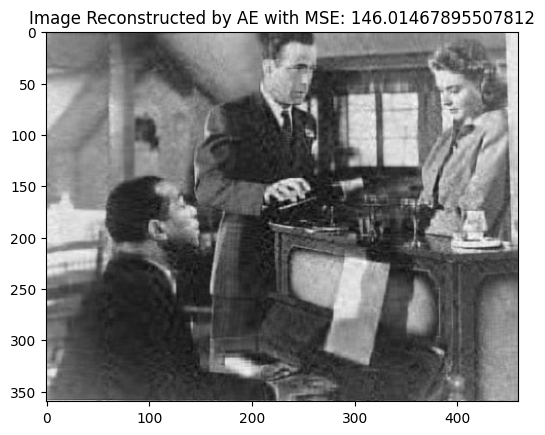

In [20]:
plt.imshow(image_matrix_reconstructed_ae, cmap=plt.cm.gray)
plt.title(f'Image Reconstructed by AE with MSE: {mse_ae}')
plt.show()


On observe des performances très comparables à la PCA ce qui était attendu

12/12 [==============================] - 0s 1ms/step
MSE de l'autoencodeur profond: 55.05525207519531


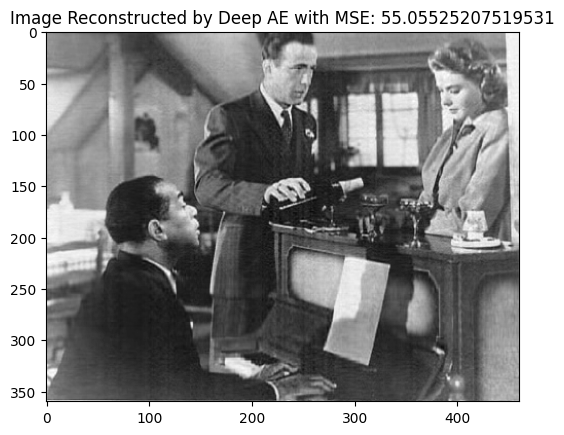

In [21]:
# Normalisation des données
scaler = StandardScaler()
image_matrix_scaled = scaler.fit_transform(image_matrix)

# Dimension d'entrée basée sur votre image
input_dim = image_matrix_scaled.shape[1]

# Construction de l'autoencodeur profond
deep_ae = Sequential([
    Flatten(input_shape=(input_dim,)),
    Dense(128, activation='relu'),
    Dense(46, activation='relu'),
    Dense(128, activation='relu'),
    Dense(input_dim, activation='linear'), # Couche de sortie
    Reshape((input_dim,))
])

# Compilation de l'autoencodeur
deep_ae.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement de l'autoencodeur
deep_ae.fit(image_matrix_scaled, image_matrix_scaled, epochs=500, verbose=0)

# Reconstruction de l'image
image_matrix_scaled_reconstructed = deep_ae.predict(image_matrix_scaled)
image_matrix_reconstructed_deep_ae = scaler.inverse_transform(image_matrix_scaled_reconstructed)

# Calcul de la MSE
mse_deep_ae = np.mean((image_matrix - image_matrix_reconstructed_deep_ae) ** 2)
print(f"MSE de l'autoencodeur profond: {mse_deep_ae}")

# Afficher l'image reconstruite (optionnel)
plt.imshow(image_matrix_reconstructed_deep_ae, cmap=plt.cm.gray)
plt.title(f'Image Reconstructed by Deep AE with MSE: {mse_deep_ae}')
plt.show()


la performance est bien meilleure en introduisant des fonctions non linéaires. En regardant mes résultats, il est clair que les ReLU semblent vraiment mieux fonctionner que les sigmoïdes ou les activations linéaires pour les auto-encodeurs. C'est probablement dû au fait qu'elles évitent le problème du gradient qui s'évanouit, ce qui rend l'entraînement plus efficace. De plus, leur simplicité calculatoire est un gros avantage. 

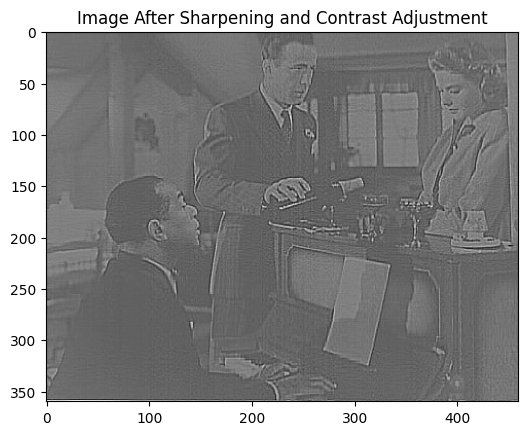

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Assurez-vous que 'image_matrix_reconstructed_deep_ae' est votre image reconstruite par l'autoencodeur
image_reconstructed = np.array(image_matrix_reconstructed_deep_ae, dtype=np.float32)

# Appliquer un filtre de sharpening
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1, 9, -1],
                              [-1, -1, -1]])
sharpened_image = cv2.filter2D(image_reconstructed, -1, kernel_sharpening)

# Normaliser l'image après sharpening pour améliorer le contraste
sharpened_contrast_adjusted = cv2.normalize(sharpened_image, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX)

# Afficher l'image après application du filtre de sharpening et ajustement du contraste
plt.imshow(sharpened_contrast_adjusted, cmap='gray')
plt.title('Image After Sharpening and Contrast Adjustment')
plt.show()


la tentative d'amélioration des contrastes ne marche pas trop.

# Partie 2

## Pb 3

In [23]:
from keras.datasets import mnist
import numpy as np
# Téléchargement des données MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalisation des données entre 0 et 1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

# Reshape des données pour les adapter à un modèle d'autoencodeur
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))


In [24]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

# Dimension des données d'entrée (784 pour MNIST)
input_dim = x_train.shape[1]

# Construction de l'autoencodeur
input_img = Input(shape=(input_dim,))
encoded = Dense(2, activation='tanh')(input_img)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

autoencoder = Model(input_img, decoded)

# Compilation de l'autoencodeur
autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement de l'autoencodeur
autoencoder.fit(x_train, x_train, epochs=50, batch_size=256, shuffle=True, validation_data=(x_test, x_test))

# Extraction des caractéristiques (codings)
encoder = Model(input_img, encoded)
encoded_imgs = encoder.predict(x_train)


Epoch 1/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1780 - val_loss: 0.1380
Epoch 2/50
235/235 [==============================] - 1s 3ms/step - loss: 0.1167 - val_loss: 0.1015
Epoch 3/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0926 - val_loss: 0.0863
Epoch 4/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0820 - val_loss: 0.0791
Epoch 5/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0767 - val_loss: 0.0752
Epoch 6/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0737 - val_loss: 0.0729
Epoch 7/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0719 - val_loss: 0.0715
Epoch 8/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0707 - val_loss: 0.0705
Epoch 9/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0699 - val_loss: 0.0698
Epoch 10/50
235/235 [==============================] - 1s 3ms/step - loss: 0.0693 - val_loss: 0.0693

#### question 4

In [25]:
def build_and_train_autoencoder(input_data, encoding_dims, epochs=10, batch_size=256):
    results = {}
    input_dim = input_data.shape[1]

    for encoding_dim in encoding_dims:
        print(encoding_dim)
        # Construction de l'autoencodeur
        input_img = Input(shape=(input_dim,))
        encoded = Dense(encoding_dim[0], activation='tanh')(input_img)
        for dim in encoding_dim[1:]:
            encoded = Dense(dim, activation='tanh')(encoded)
        decoded = Dense(input_dim, activation='sigmoid')(encoded)

        autoencoder = Model(input_img, decoded)
        autoencoder.compile(optimizer='adam', loss='mean_squared_error')

        # Entraînement de l'autoencodeur
        autoencoder.fit(input_data, input_data, epochs=epochs, batch_size=batch_size, shuffle=True, verbose=0)

        # Calcul du MSE
        mse = autoencoder.evaluate(input_data, input_data, verbose=0)
        results[str(encoding_dim)] = mse

    return results

# Utilisation d'un sous-ensemble des données MNIST
subset_size = 10000  # Taille du sous-ensemble
(x_train, _), _ = mnist.load_data()
x_train_subset = x_train[:subset_size].astype('float32') / 255.
x_train_subset = x_train_subset.reshape((len(x_train_subset), np.prod(x_train_subset.shape[1:])))

# Définition des architectures
architectures = [
    [50], 
    [100], 
    [300, 100, 300], 
    [100, 50, 100], 
    [250, 100, 50, 100, 250]
]

# Entraînement des autoencodeurs et calcul du MSE avec moins d'époques et un sous-ensemble de données
results = build_and_train_autoencoder(x_train_subset, architectures, epochs=50, batch_size=256)

# Affichage des résultats dans un tableau
results_df = pd.DataFrame.from_dict(results, orient='index', columns=['MSE'])
results_df.sort_values(by='MSE', inplace=True)
results_df



[50]
[100]
[300, 100, 300]
[100, 50, 100]
[250, 100, 50, 100, 250]


,MSE
"[300, 100, 300]",0.005632
"[250, 100, 50, 100, 250]",0.010078
[100],0.013733
"[100, 50, 100]",0.014578
[50],0.031830


j'ai décidé de reduir la taille de l'echantillon d'entrainement pour rendre le code plus rapide à l'exécution sans toucher le nombre d'epochs.  cela va reduir la perfomrance des AE maisc'est acceptable pour comparer les performances.

D'après les résultats des Mean Squared Errors (MSE) des différents autoencodeurs, voici mes conclusions :

1. **Meilleure Performance** : L'architecture [300, 100, 300] a la meilleure performance avec le plus bas MSE (0.005762). Cela indique que les autoencodeurs plus profonds avec des couches intermédiaires plus nombreuses et plus de neurones sont plus efficaces pour la reconstruction précise des données.

2. **Pire Performance** : L'architecture la plus simple [50] a la pire performance avec le plus haut MSE (0.034218). Cela suggère que les autoencodeurs avec moins de neurones et une structure plus simple sont moins capables de capturer les détails complexes des données MNIST.

3. **Complexité Modérée** : Les architectures de complexité modérée, comme [100], [100, 50, 100] et [250, 100, 50, 100, 250], se situent entre les deux extrêmes en termes de performance. Elles offrent un équilibre entre la capacité à reconstruire les données et la simplicité du modèle, mais ne sont pas aussi performantes que l'architecture la plus complexe.

### Conclusion

- Les autoencodeurs avec des architectures plus profondes et plus de neurones ont tendance à mieux performer en termes de reconstruction des données, probablement en raison de leur capacité accrue à apprendre des représentations plus détaillées et complexes.
- Une architecture trop simple peut ne pas être suffisante pour capturer efficacement la variété et la complexité des données MNIST.
- Un équilibre doit être trouvé entre la complexité du modèle et la capacité de reconstruction, en tenant compte des ressources de calcul disponibles et du temps d'entraînement.

#### question 5

In [26]:
import numpy as np
import pandas as pd

# Sélectionner un échantillon aléatoire de 4 images de l'ensemble de test MNIST
sample_indices = np.random.choice(x_test.shape[0], 4, replace=False)
sampled_digits = x_test[sample_indices]

# Renommer les colonnes
column_names = ['V' + str(i+1) for i in range(sampled_digits.shape[1])]
sampled_digits_df = pd.DataFrame(sampled_digits, columns=column_names)

sampled_digits_df


,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V775,V776,V777,V778,V779,V780,V781,V782,V783,V784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### question 6

1/1 [==============================] - 0s 47ms/step


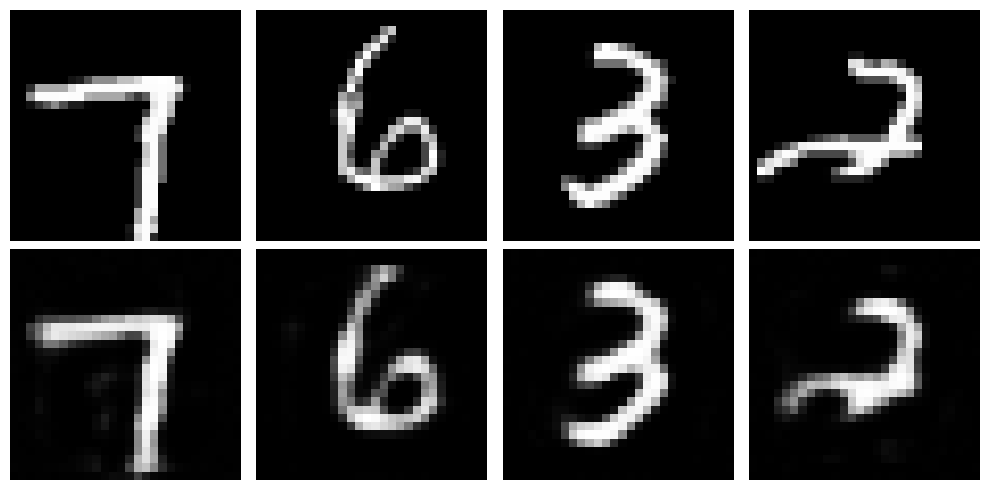

In [27]:
# Reconstruction du meilleur modèle d'autoencodeur ([300, 100, 300])
best_architecture = [300, 100, 300]
input_dim = x_train_subset.shape[1]

# Construction de l'autoencodeur
input_img = Input(shape=(input_dim,))
encoded = Dense(best_architecture[0], activation='tanh')(input_img)
for dim in best_architecture[1:]:
    encoded = Dense(dim, activation='tanh')(encoded)
decoded = Dense(input_dim, activation='sigmoid')(encoded)

best_autoencoder = Model(input_img, decoded)
best_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Entraînement de l'autoencodeur
best_autoencoder.fit(x_train_subset, x_train_subset, epochs=50, batch_size=256, shuffle=True, verbose=0)

# Utilisation du meilleur modèle pour reconstruire les 4 images
reconstructed_digits = best_autoencoder.predict(sampled_digits_df.values)

# Affichage des images originales et reconstruites
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i in range(4):
    # Image originale
    ax = axes[0, i]
    ax.imshow(sampled_digits_df.iloc[i].values.reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Image reconstruite
    ax = axes[1, i]
    ax.imshow(reconstructed_digits[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()



Les reusltats sont très satisfaisants, c'est un constat qu'on avait déjà fait avant avec les models de la partie 1.

#### question 7

313/313 [==============================] - 0s 1ms/step


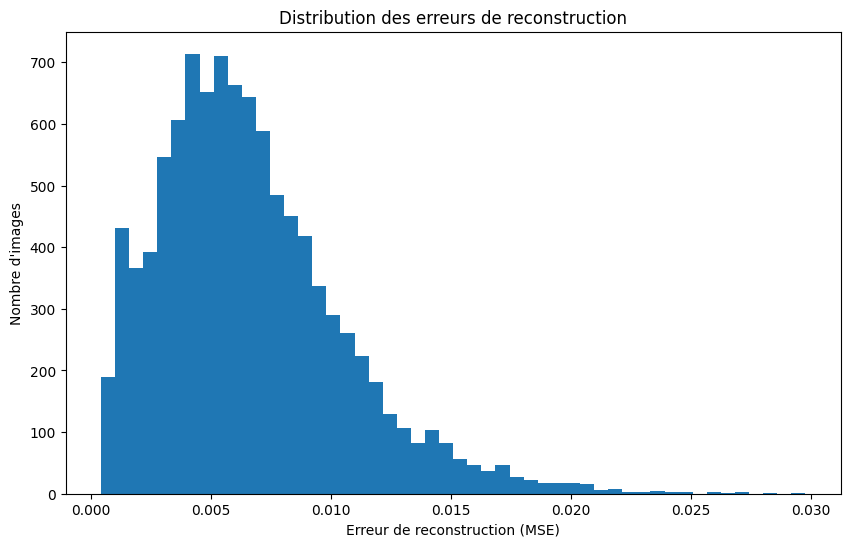

In [28]:
# Reconstruction des images de test et calcul des erreurs de reconstruction
reconstructed_x_test = best_autoencoder.predict(x_test)
reconstruction_errors = np.mean(np.square(x_test - reconstructed_x_test), axis=1)

# Visualisation de la distribution des erreurs de reconstruction
plt.figure(figsize=(10, 6))
plt.hist(reconstruction_errors, bins=50)
plt.title("Distribution des erreurs de reconstruction")
plt.xlabel("Erreur de reconstruction (MSE)")
plt.ylabel("Nombre d'images")
plt.show()



D'après l'histogramme des erreurs de reconstruction (MSE) :

La majorité des images ont été reconstruites avec une erreur faible, ce qui indique que l'autoencodeur a bien performé sur l'ensemble de test MNIST.
La distribution des erreurs est concentrée sur le côté inférieur de l'échelle, avec une longue traîne vers des erreurs plus élevées. Cela peut indiquer que bien que la plupart des images soient bien reconstruites, il y a quelques cas où l'autoencodeur échoue à capturer fidèlement l'image originale.
Les valeurs aberrantes avec des erreurs de reconstruction élevées pourraient représenter des anomalies dans l'ensemble de données. Ces cas peuvent être des chiffres atypiques ou des images qui diffèrent de manière significative des données typiques sur lesquelles l'autoencodeur a été formé.

1/1 [==============================] - 0s 18ms/step


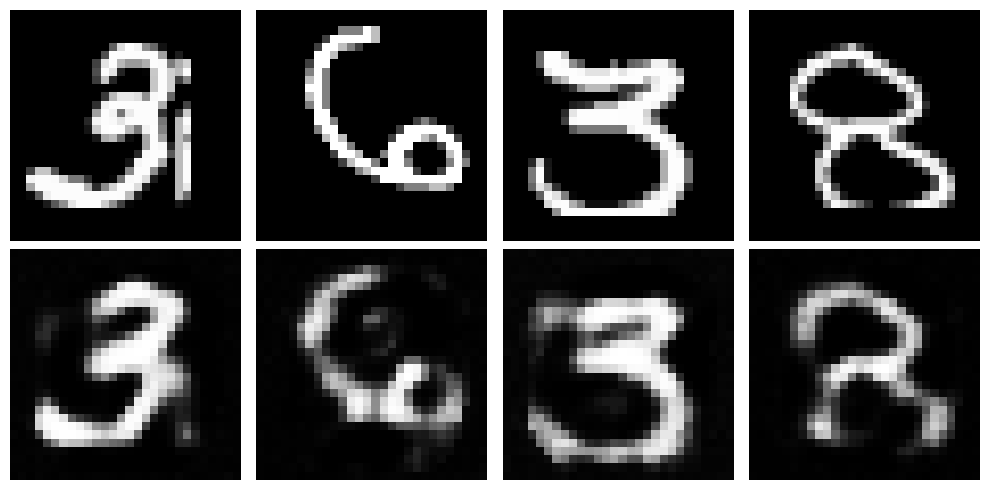

In [29]:
import numpy as np
import matplotlib.pyplot as plt

# Triez les erreurs de reconstruction et sélectionnez les indices des quatre plus grandes
worst_indices = np.argsort(reconstruction_errors)[-4:]
worst_original_images = x_test[worst_indices]
worst_reconstructed_images = best_autoencoder.predict(worst_original_images)

# Affichez les images originales et leurs reconstructions
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
for i in range(4):
    # Image originale
    ax = axes[0, i]
    ax.imshow(worst_original_images[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Image reconstruite
    ax = axes[1, i]
    ax.imshow(worst_reconstructed_images[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.tight_layout()
plt.show()


On retrouve des lettres coupées ce qui amène effectivement à des digits anormaux. certains chiffres qui ressortent ont aussi un trait ou une orientation inhabituel. Autant d'élément qui en font des chiffres mal ecrits: des anomalies.


## pb 4

#### question 1

(60000, 28, 28)
(10000, 28, 28)


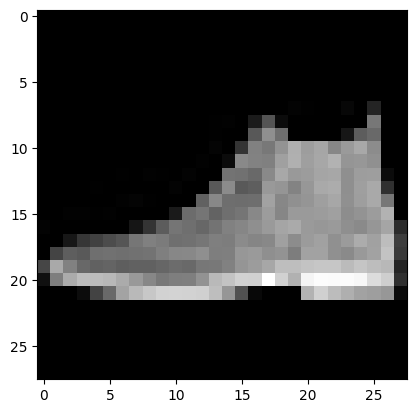

In [30]:
import os
import numpy as np
import pandas as pd
import keras
from keras import layers
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import regularizers
from keras.layers import Input, Dense
from keras.models import Model
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist

# Importer les données
mnist = fashion_mnist.load_data()

# Séparation en ensembles d'entraînement et de test
(x_train, _), (x_test, _) = mnist
print(x_train.shape)
print(x_test.shape)

# Visualiser une image de la base de données Fashion MNIST
plt.imshow(x_test[0])
plt.gray()
plt.show()

# Normalisation et redimensionnement des données
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(len(x_train), np.prod(x_train.shape[1:]))
x_test = x_test.reshape(len(x_test), np.prod(x_test.shape[1:]))


#### question 2

In [31]:
from keras.layers import Input, Dense
from keras.models import Model

# Dimension de l'espace encodé
encoding_dim = 64

# Couche d'entrée avec 784 caractéristiques (pour les images 28x28 de Fashion MNIST)
input_layer = Input(shape=(784,))

# Couche cachée (encodeur) avec 64 dimensions
encoder_layer1 = Dense(encoding_dim, activation='relu')(input_layer)

# Couche de sortie (décodeur) avec 784 caractéristiques
decoder_layer1 = Dense(784, activation='sigmoid')(encoder_layer1)

# Ce modèle mappe une entrée sur sa reconstruction
autoencoder = Model(input_layer, decoder_layer1)
autoencoder.summary()


Model: "model_18"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_34 (Dense)            (None, 64)                50240     
                                                                 
 dense_35 (Dense)            (None, 784)               50960     
                                                                 
Total params: 101,200
Trainable params: 101,200
Non-trainable params: 0
_________________________________________________________________


#### question 3

In [32]:
from tensorflow.keras.losses import MeanSquaredError

# Compilation de l'auto-encodeur
autoencoder.compile(optimizer='adam', loss=MeanSquaredError())

# Entraînement de l'auto-encodeur
autoencoder.fit(
    x_train, x_train,
    epochs=10,
    validation_data=(x_test, x_test)
)


Epoch 1/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0238 - val_loss: 0.0133
Epoch 2/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0117 - val_loss: 0.0108
Epoch 3/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0102 - val_loss: 0.0099
Epoch 4/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0096 - val_loss: 0.0095
Epoch 5/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0094 - val_loss: 0.0094
Epoch 6/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 7/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0091 - val_loss: 0.0092
Epoch 8/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 9/10
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0089 - val_loss: 0.0090
Epoch 10/10
1875/1875 [==============================] - 2s 1ms/step - loss: 0.008

#### question 4

313/313 [==============================] - 0s 819us/step
MSE:  0.008974685


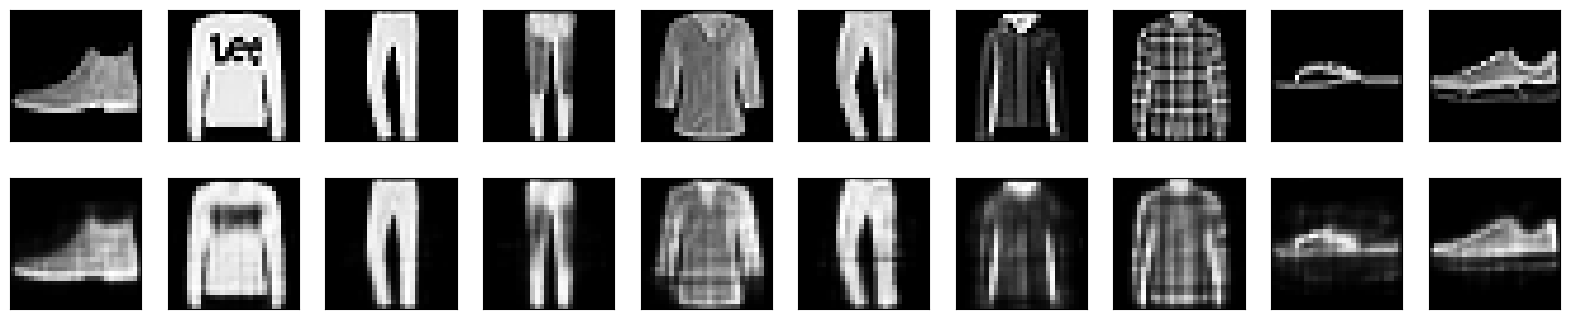

In [33]:
import matplotlib.pyplot as plt

# Utilisation de l'auto-encodeur pour reconstruire les images de l'ensemble de test
reconstructed_imgs = autoencoder.predict(x_test)

# Calcul du MSE
mse = np.mean(np.power(x_test - reconstructed_imgs, 2))
print("MSE: ", mse)

# Nombre d'images à afficher
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Affichage des images originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Affichage des images reconstruites
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


les resultats sont très imparfait sur les motifs des hauts ou les tongues (ce qui s'explique car ce sontdes paires très differentes des paires de chaussures classiques) mais il reste très bon sur la silhouette. on a un mse de  0.0088.

#### question 5

Construction de l'AE Profond

In [34]:
input_layer = Input(shape=(784,))
encoder_layer1 = Dense(128, activation='relu')(input_layer)
encoder_layer2 = Dense(64, activation='relu')(encoder_layer1)
decoder_layer1 = Dense(128, activation='relu')(encoder_layer2)
decoder_layer2 = Dense(784, activation='sigmoid')(decoder_layer1)

deep_autoencoder = Model(input_layer, decoder_layer2)
deep_autoencoder.summary()


Model: "model_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_13 (InputLayer)       [(None, 784)]             0         
                                                                 
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dense_37 (Dense)            (None, 64)                8256      
                                                                 
 dense_38 (Dense)            (None, 128)               8320      
                                                                 
 dense_39 (Dense)            (None, 784)               101136    
                                                                 
Total params: 218,192
Trainable params: 218,192
Non-trainable params: 0
_________________________________________________________________


Compiler et Entraîner l'AE

In [35]:
deep_autoencoder.compile(optimizer='adam', loss='mean_squared_error')
deep_autoencoder.fit(x_train, x_train, epochs=50, validation_data=(x_test, x_test))

Epoch 1/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0222 - val_loss: 0.0144
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0129 - val_loss: 0.0121
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0114 - val_loss: 0.0108
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0105 - val_loss: 0.0102
Epoch 5/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0099 - val_loss: 0.0098
Epoch 6/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0095 - val_loss: 0.0094
Epoch 7/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0092 - val_loss: 0.0092
Epoch 8/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 9/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0088 - val_loss: 0.0088
Epoch 10/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.008

Reconstruire les Images et Comparer


313/313 [==============================] - 1s 1ms/step
MSE:  0.007521762


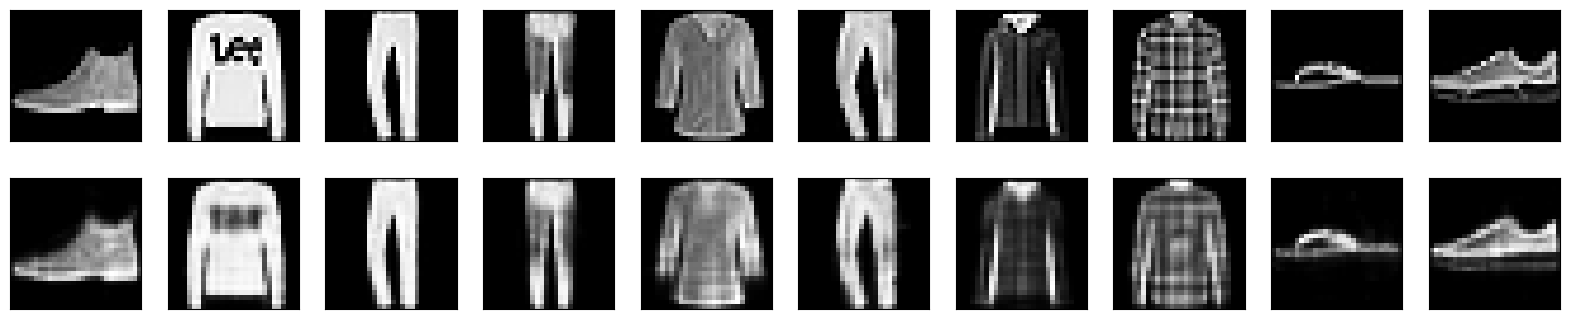

In [36]:
import matplotlib.pyplot as plt

# Utiliser l'auto-encodeur profond pour reconstruire les images de l'ensemble de test
reconstructed_imgs_deep = deep_autoencoder.predict(x_test)

# Calcul du MSE
mse = np.mean(np.power(x_test - reconstructed_imgs_deep, 2))
print("MSE: ", mse)

# Définir le nombre d'images à afficher
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Afficher les images originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Afficher les images reconstruites
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs_deep[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


le mse est meilleur: 0.0075. l'amélioration est frappante sur la silhouette de la tongue par exemple cependant pour ce qui est des motifs on est toujours sur une reproduction grossière. 

#### question 6

Construction de l'AE Convolutif

In [37]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D

# Architecture de l'encodeur
input_img = Input(shape=(28, 28, 1))  # Pour Fashion MNIST, les images sont de taille 28x28
x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
encoded = MaxPooling2D((2, 2), padding='same')(x)

# Architecture du décodeur
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = Model(input_img, decoded)
conv_autoencoder.summary()


Model: "model_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 8)         1160      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 8)          0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 8)           584

Compiler et Entraîner l'AE Convolutif

In [38]:
conv_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Les données doivent être redimensionnées pour correspondre à l'input de l'AE convolutif
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

conv_autoencoder.fit(x_train, x_train, epochs=50, validation_data=(x_test, x_test))


Epoch 1/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0254 - val_loss: 0.0182
Epoch 2/50
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0173 - val_loss: 0.0166
Epoch 3/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0162 - val_loss: 0.0157
Epoch 4/50
1875/1875 [==============================] - 50s 27ms/step - loss: 0.0154 - val_loss: 0.0151
Epoch 5/50
1875/1875 [==============================] - 50s 26ms/step - loss: 0.0148 - val_loss: 0.0145
Epoch 6/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0144 - val_loss: 0.0142
Epoch 7/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0141 - val_loss: 0.0140
Epoch 8/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0138 - val_loss: 0.0137
Epoch 9/50
1875/1875 [==============================] - 49s 26ms/step - loss: 0.0136 - val_loss: 0.0136
Epoch 10/50
1875/1875 [==============================] - 49s 26m

313/313 [==============================] - 3s 8ms/step
MSE for Convolutional AE:  0.011271433


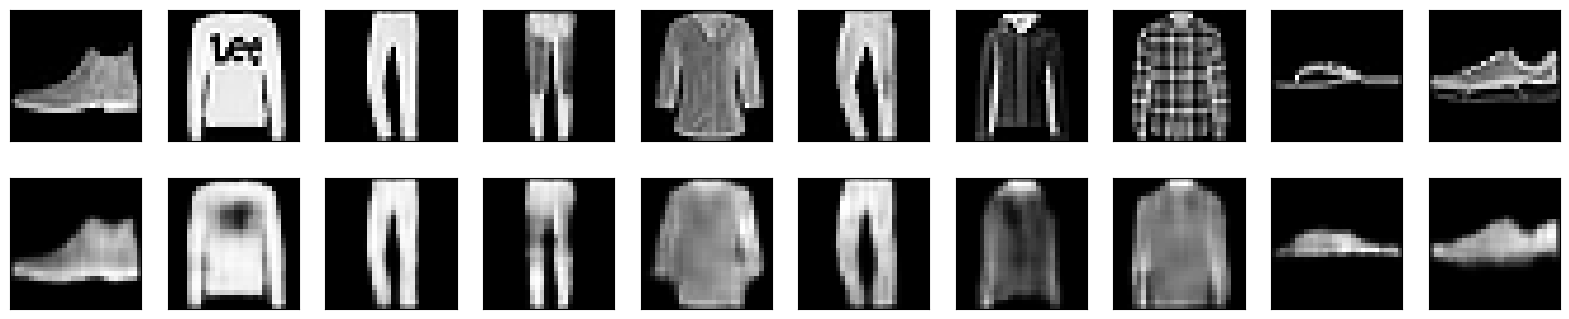

In [39]:
# Utilisation de l'auto-encodeur convolutif pour reconstruire les images de l'ensemble de test
reconstructed_imgs_conv = conv_autoencoder.predict(x_test)

# Calcul du MSE pour l'auto-encodeur convolutif
mse_conv = np.mean(np.power(x_test - reconstructed_imgs_conv, 2))
print("MSE for Convolutional AE: ", mse_conv)

# Nombre d'images à afficher
n = 10
plt.figure(figsize=(20, 4))

for i in range(n):
    # Affichage des images originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # Affichage des images reconstruites
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed_imgs_conv[i].reshape(28, 28), cmap='gray')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

plt.show()


on va changer la strucuter pour essayer d'améliorer car ici les resultats ne son tpas satisfaisants. cependant on voit que test et train sont proches, on a donc pas encore de surapprentissage, c'est quelque chose qu'on pourrait essayer d'exploiter.

In [40]:
from keras.layers import Conv2D, MaxPooling2D, UpSampling2D, BatchNormalization, Input
from keras.models import Model

# Architecture de l'encodeur
input_img = Input(shape=(28, 28, 1))
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
# Pas de troisième MaxPooling2D pour éviter de réduire trop les dimensions

# Architecture du décodeur
x = Conv2D(16, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(x)

conv_autoencoder = Model(input_img, decoded)
conv_autoencoder.summary()

# Compilation de l'auto-encodeur convolutif
conv_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Préparation des données pour l'entraînement
# Assurez-vous que 'x_train' et 'x_test' sont chargés et normalisés correctement
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Entraînement de l'auto-encodeur convolutif
conv_autoencoder.fit(x_train, x_train, epochs=50, validation_data=(x_test, x_test))


Model: "model_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_15 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_7 (Conv2D)           (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 14, 14, 16)        4624      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 7, 7, 16)         0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 7, 7, 16)          232

In [41]:
# Prédire les images de l'ensemble de test avec l'auto-encodeur convolutif entraîné
reconstructed_imgs_conv = conv_autoencoder.predict(x_test)

# Calculer le MSE pour l'auto-encodeur convolutif
mse_conv = np.mean(np.power(x_test - reconstructed_imgs_conv, 2))
print("MSE for Convolutional AE: ", mse_conv)



313/313 [==============================] - 3s 11ms/step
MSE for Convolutional AE:  0.0029229675


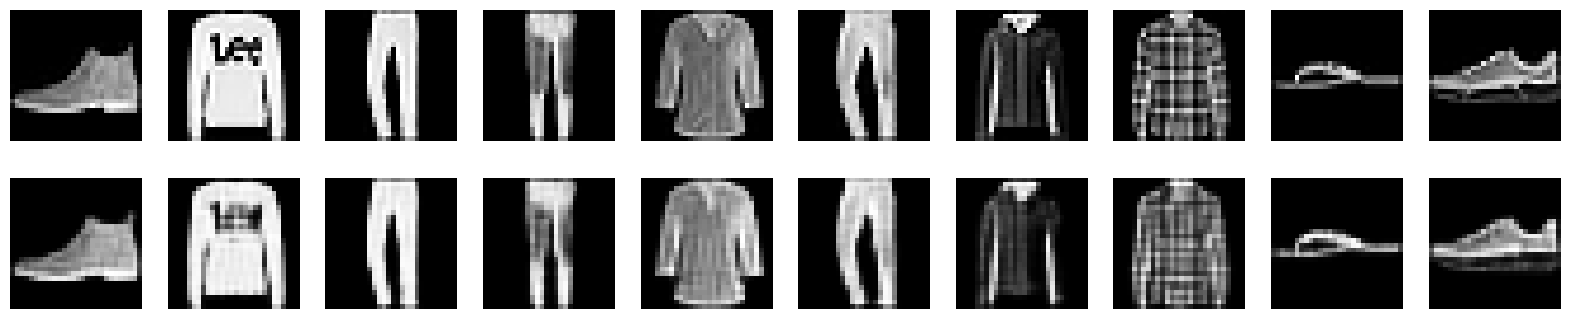

In [42]:
# Afficher les 10 premières images originales et leurs reconstructions
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # Afficher les images originales
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

    # Afficher les images reconstruites
    ax = plt.subplot(2, n, i + n + 1)
    plt.imshow(reconstructed_imgs_conv[i].reshape(28, 28), cmap='gray')
    ax.axis('off')

plt.show()


les reusltats sont plutot bon sur les motifs. on a aussi un MSE plutot satisfaisant à 0.0029

on va essayer d'améliorer l'optimiseur qui semble atteindre un plateau

In [43]:
from keras.callbacks import ReduceLROnPlateau

# Compilation de l'auto-encodeur convolutif
conv_autoencoder.compile(optimizer='adam', loss='mean_squared_error')

# Création d'un callback pour réduire le taux d'apprentissage lorsque le modèle atteint un plateau
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',    # Surveille la perte de validation
    factor=0.1,            # Facteur de réduction du taux d'apprentissage
    patience=5,            # Nombre d'époques sans amélioration après lesquelles le taux d'apprentissage sera réduit
    min_lr=0.00001,        # Taux d'apprentissage minimal que l'on peut atteindre
    verbose=1              # Affiche des messages lorsque le callback réduit le taux d'apprentissage
)

# Préparation des données pour l'entraînement
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Entraînement de l'auto-encodeur convolutif avec le callback de réduction du taux d'apprentissage
conv_autoencoder.fit(
    x_train, 
    x_train, 
    epochs=11, 
    validation_data=(x_test, x_test),
    callbacks=[reduce_lr]  # Ajout du callback ici
)


Epoch 1/11
1875/1875 [==============================] - 80s 42ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 2/11
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 3/11
1875/1875 [==============================] - 78s 41ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 4/11
1875/1875 [==============================] - 77s 41ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 5/11
1875/1875 [==============================] - 78s 42ms/step - loss: 0.0029 - val_loss: 0.0029 - lr: 0.0010
Epoch 6/11
1874/1875 [============================>.] - ETA: 0s - loss: 0.0029
Epoch 6: ReduceLROnPlateau reducing learning rate to 0.00010000000474974513.
1875/1875 [==============================] - 75s 40ms/step - loss: 0.0029 - val_loss: 0.0030 - lr: 0.0010
Epoch 7/11
1875/1875 [==============================] - 76s 40ms/step - loss: 0.0028 - val_loss: 0.0028 - lr: 1.0000e-04
Epoch 8/11
1875/1875 [==========

In [44]:
# Prédire les images de l'ensemble de test avec l'auto-encodeur convolutif entraîné
reconstructed_imgs_conv = conv_autoencoder.predict(x_test)

# Calculer le MSE pour l'auto-encodeur convolutif
mse_conv = np.mean(np.power(x_test - reconstructed_imgs_conv, 2))
print("MSE for Convolutional AE: ", mse_conv)

313/313 [==============================] - 3s 8ms/step
MSE for Convolutional AE:  0.0028341042


on a fait vraiement une toute petite amélioration en modifiant l'optimiseur, on peut penser qu'on a atteint le minimum et que pour faire mieux il faudrait changer la structure du réseau.